2.Cual es el valor promedio de acuerdos de pago por usuario único para el mes de septiembre?

In [1]:
#importo las librerias necesarias para responder la pregunta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importo el dataset

df_clean = pd.read_csv(r"data/df_clean.csv", sep=";")

In [3]:
# Obtengo los registros con compromiso de pago

columnas_objetivo_acuerdos = ['session_id', 'date', 'hour', 'success_type', 'Phone', "Cantidad"]
objetivo_acuerdos = df_clean[columnas_objetivo_acuerdos]


con_compromiso = objetivo_acuerdos[objetivo_acuerdos['success_type'] == "Compromiso pago"]

In [4]:
# Habiendo chequeado que un mismo usuario contiene mas de una propuesta, Me quedo con la propuesta mas reciente si es que coincide el monto de la deuda

con_compromiso['date'] = pd.to_datetime(con_compromiso['date'], format='%d/%m/%Y')

# Ordeno el DataFrame por 'Phone' y 'date' de forma descendente
con_compromiso.sort_values(by=['Phone', 'date'], ascending=[True, False], inplace=True)

# Elimino duplicados, conservando solo el primero (el más reciente)
con_compromiso.drop_duplicates(subset='Phone', keep='first', inplace=True)

C:\Users\mpvac\AppData\Local\Temp\ipykernel_17044\3225977232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_compromiso['date'] = pd.to_datetime(con_compromiso['date'], format='%d/%m/%Y')
C:\Users\mpvac\AppData\Local\Temp\ipykernel_17044\3225977232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_compromiso.sort_values(by=['Phone', 'date'], ascending=[True, False], inplace=True)
C:\Users\mpvac\AppData\Local\Temp\ipykernel_17044\3225977232.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [5]:
# calculo el valor promedio de acuerdos de pago por usuario único

valor_promedio_acuerdos = con_compromiso['Cantidad'].mean()
valor_promedio_acuerdos

34696.95170909091

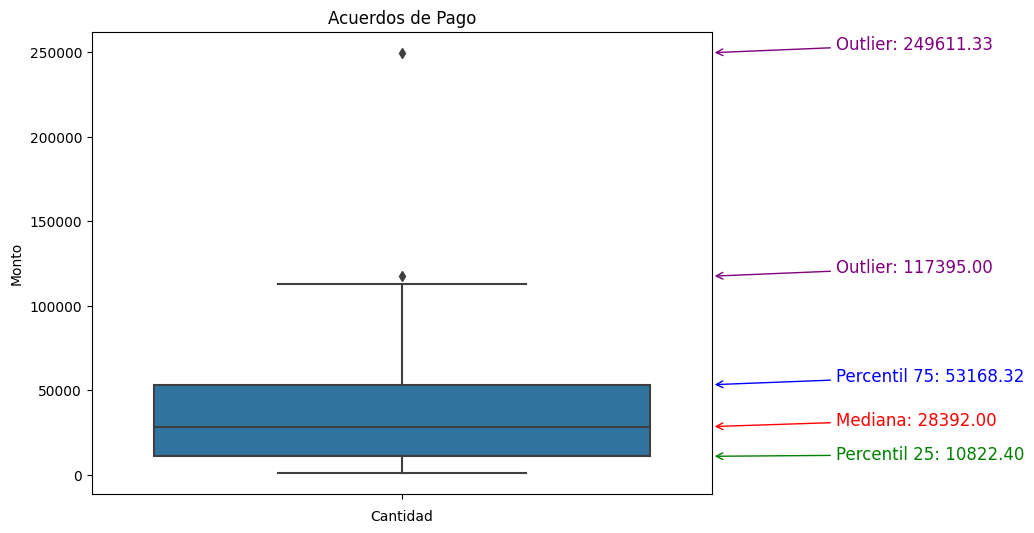

In [6]:
# Creo grafico boxplot, para visualizar si existen outliers en los acuerdos de pago

plt.figure(figsize=(8, 6))
sns.boxplot(data=con_compromiso, y='Cantidad', showfliers=True)
plt.title('Acuerdos de Pago')
plt.xlabel('Cantidad')
plt.ylabel('Monto')

median_value = con_compromiso['Cantidad'].median()
q1_value = con_compromiso['Cantidad'].quantile(0.25)
q3_value = con_compromiso['Cantidad'].quantile(0.75)

plt.annotate(f'Mediana: {median_value:.2f}', xy=(0.5, median_value), xytext=(0.7, median_value + 1000),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')
plt.annotate(f'Percentil 25: {q1_value:.2f}', xy=(0.5, q1_value),
             xytext=(0.7, q1_value - 2000),
             arrowprops=dict(arrowstyle='->', color='green'), fontsize=12, color='green')
plt.annotate(f'Percentil 75: {q3_value:.2f}', xy=(0.5, q3_value),
             xytext=(0.7, q3_value + 2000),
             arrowprops=dict(arrowstyle='->', color='blue'), fontsize=12, color='blue')

outliers = con_compromiso[con_compromiso['Cantidad'] > q3_value + 1.5 * (q3_value - q1_value)]
for index, row in outliers.iterrows():
    plt.annotate(f'Outlier: {row["Cantidad"]:.2f}', xy=(0.5, row["Cantidad"]), xytext=(0.7, row["Cantidad"] + 2000),
                 arrowprops=dict(arrowstyle='->', color='purple'), fontsize=12, color='purple')

plt.show()

In [7]:
# Calculo la mediana de los acuerdos de pago

mediana_acuerdos = con_compromiso['Cantidad'].median()
mediana_acuerdos

28392.0

Basado en el análisis de los datos de acuerdos de pago para el mes de septiembre, puedo observar que el valor promedio fue de 34696.95, mientras que la mediana, que representa el valor que divide a la muestra en dos mitades iguales, fué de 28392.0.

La mediana es una métrica que no se ve afectada por valores extremos (Outliers) y proporciona una representación más precisa del monto de la mayoría de los acuerdos de pago.